In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
#pip install kaggle --upgrade

In [3]:
#!kaggle competitions download -c titanic 

# 캐글 데이터셋 홈페이지 내 API 주소 복사/붙여넣기. 
#! 앞에 느낌표 꼭!!!!! 붙어야함!

In [4]:
# import shutil

# filename = 'titanic.zip' # 압축 해제할 파일 이름
# extrac_dir = 'titanic' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태

# shutil.unpack_archive(filename, extrac_dir, archive_format)


In [5]:
# import os

# os.listdir('titanic/')

In [6]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

# 1번 수치형 데이터
- train_1

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_1 = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Age 결측치 존재

# 2번 비수치형+수치형 데이터
- train_2

In [12]:
train_2 = train.copy()
train_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치 존재하는 컬럼
- Age
- Cabin
- Embarked

In [10]:
train_2.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Age: mean 값으로 처리
- Cabin: 204개 중 unique 값이 147개, 빈도가 4니까 컬럼 삭제
- Embarked: 889개 중 빈도가 644니까 해당 데이터인 S로 처리

In [17]:
# Age 처리
train_2['Age'] = train_2.loc[:, ['Age']].fillna(train_2['Age'].mean().round())
train_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Cabin 삭제
del train_2['Cabin']

In [27]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
# Embarked 처리
train_2['Embarked']= train_2.loc[:, 'Embarked'].fillna('S')
train_2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


분석할 때 Name 과 Ticket 값은 필요하지 않을 것 같음.
- Name, Ticket 컬럼 삭제

In [36]:
del train_2['Name']
del train_2['Ticket']

In [39]:
train_2.info()
train_2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


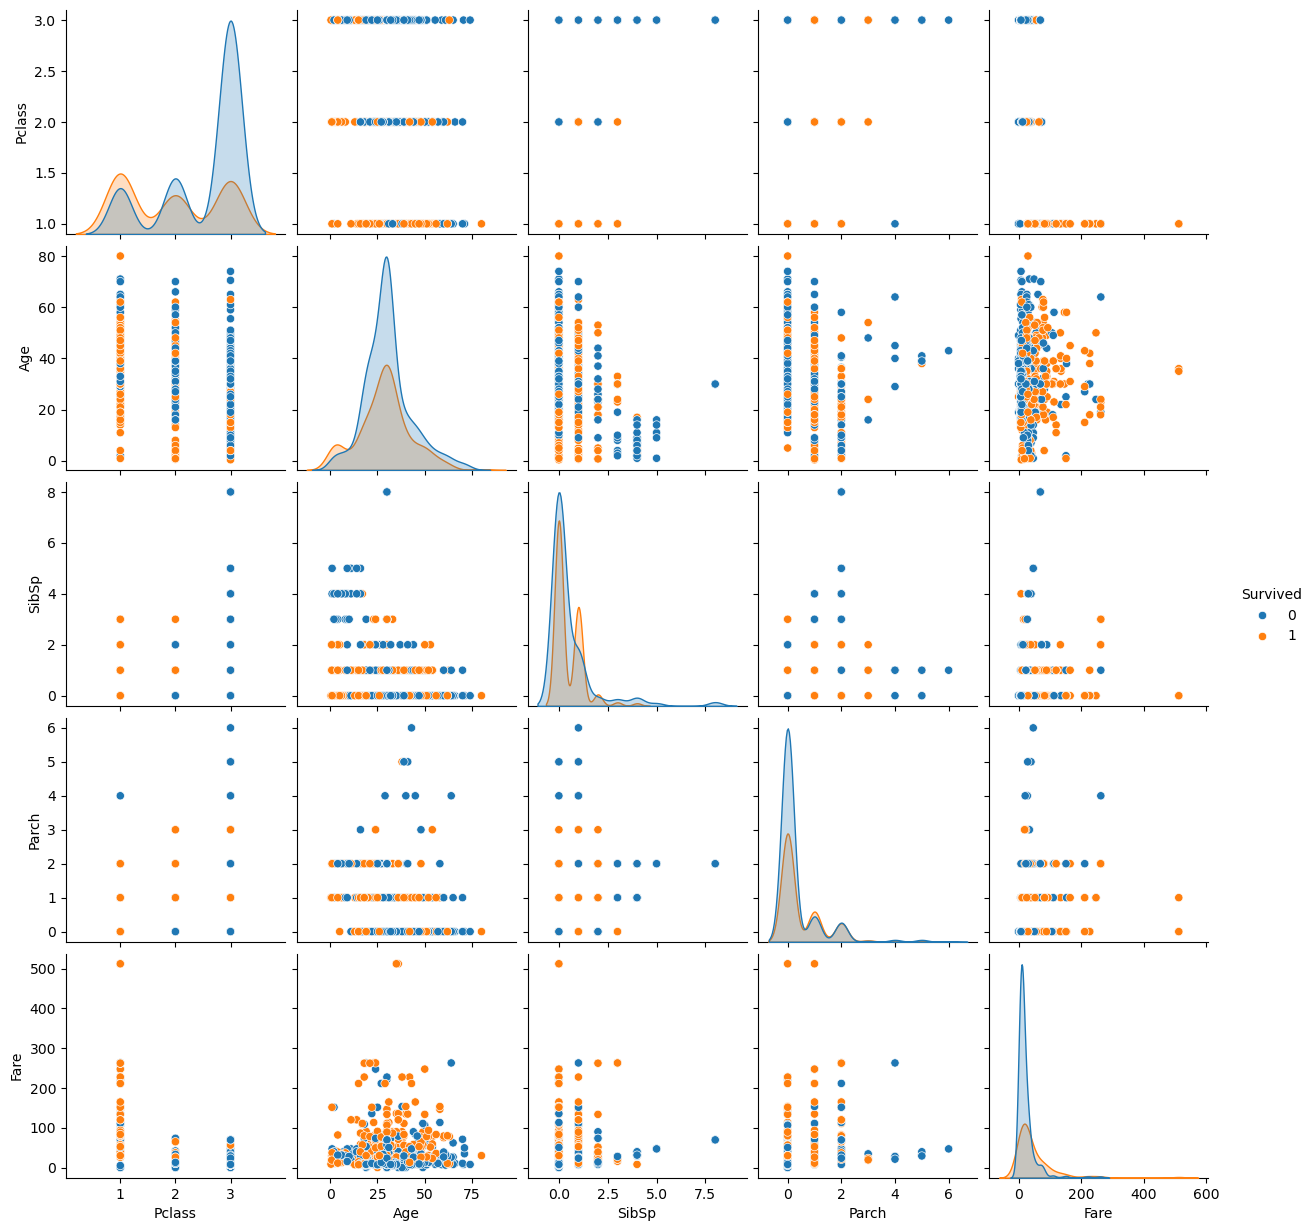

In [52]:
train_2_y= train_2.copy()
del train_2_y['PassengerId']
sns.pairplot(train_2_y, hue= 'Survived')

Fare의 분포 확인

<Axes: ylabel='Fare'>

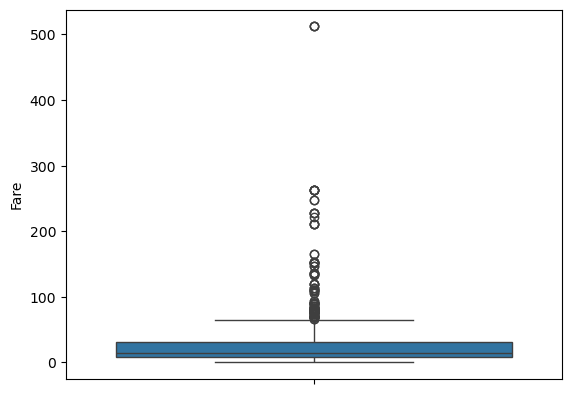

In [60]:
sns.boxplot(train_2['Fare'])

500 언저리 값 이상치로 판단

In [63]:
# Fare 기준 내림차 확인
train_2.sort_values(by='Fare', ascending=False).iloc[:10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,female,35.0,0,0,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C
679,680,1,1,male,36.0,0,1,512.3292,C
88,89,1,1,female,23.0,3,2,263.0000,S
27,28,0,1,male,19.0,3,2,263.0000,S
341,342,1,1,female,24.0,3,2,263.0000,S
438,439,0,1,male,64.0,1,4,263.0000,S
311,312,1,1,female,18.0,2,2,262.3750,C
742,743,1,1,female,21.0,2,2,262.3750,C
118,119,0,1,male,24.0,0,1,247.5208,C


512값 3개 존재.  
-> 258, 737, 679 데이터 삭제.

In [64]:
train_2 = train_2[train_2['Fare'] != 512.3292]

In [65]:
train_2.sort_values(by='Fare', ascending=False).iloc[:10]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,male,19.0,3,2,263.0000,S
341,342,1,1,female,24.0,3,2,263.0000,S
438,439,0,1,male,64.0,1,4,263.0000,S
88,89,1,1,female,23.0,3,2,263.0000,S
742,743,1,1,female,21.0,2,2,262.3750,C
311,312,1,1,female,18.0,2,2,262.3750,C
118,119,0,1,male,24.0,0,1,247.5208,C
299,300,1,1,female,50.0,0,1,247.5208,C
716,717,1,1,female,38.0,0,0,227.5250,C
700,701,1,1,female,18.0,1,0,227.5250,C


<Axes: ylabel='Fare'>

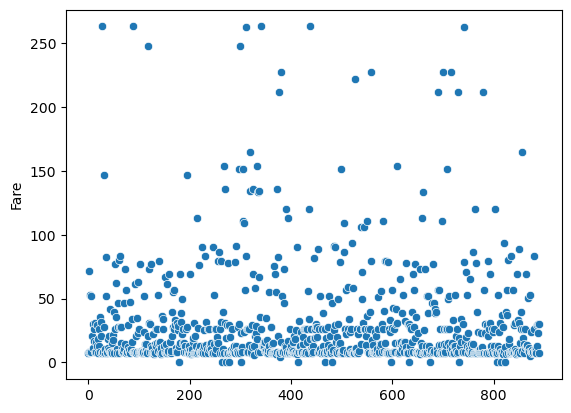

In [70]:
sns.scatterplot(train_2['Fare'])

In [72]:
train_2.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888,888.000000,888.000000,888.000000,888.000000,888
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,575,NaN,NaN,NaN,NaN,646
mean,445.618243,0.381757,2.313063,NaN,29.740056,0.524775,0.381757,30.582164,NaN
std,257.405474,0.486091,0.834007,NaN,13.020462,1.104186,0.806949,41.176366,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,222.750000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,445.500000,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,667.250000,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,30.771850,NaN


분석할 때 PassengerId도 필요하지 않을 것 같다!!
- PassengerId 컬럼 삭제

In [ ]:
del train_2['PassengerId']

In [76]:
train_2.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888,888.000000,888.000000,888.000000,888.000000,888
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,575,NaN,NaN,NaN,NaN,646
mean,0.381757,2.313063,NaN,29.740056,0.524775,0.381757,30.582164,NaN
std,0.486091,0.834007,NaN,13.020462,1.104186,0.806949,41.176366,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,30.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,30.771850,NaN


<Axes: ylabel='Age'>

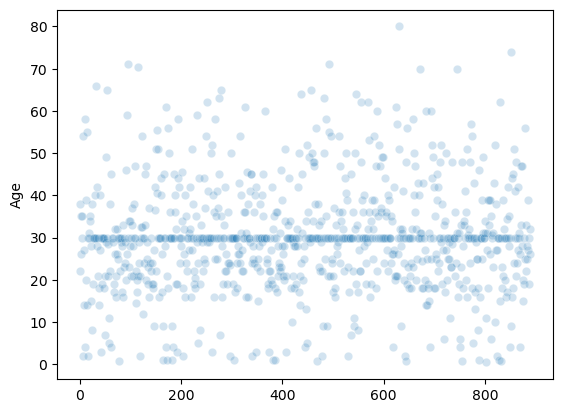

In [77]:
sns.scatterplot(train_2['Age'], alpha= 0.2)

<Axes: ylabel='SibSp'>

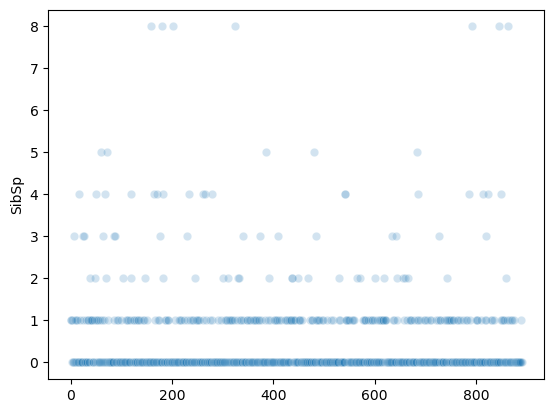

In [78]:
sns.scatterplot(train_2['SibSp'], alpha= 0.2)

<Axes: ylabel='Parch'>

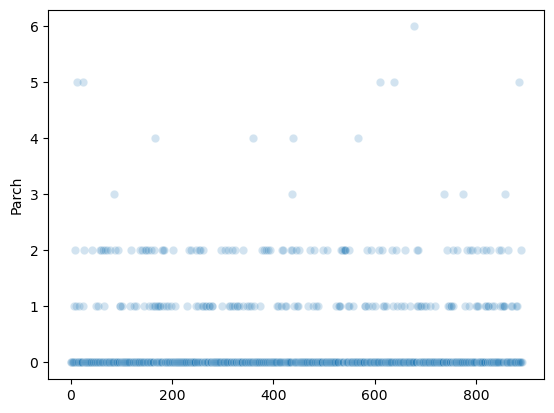

In [79]:
sns.scatterplot(train_2['Parch'], alpha= 0.2)

## 인코딩, 스케일링

- 인코딩: Sex, Embarked
    - 레이블 인코딩: Sex
    - 원핫 인코딩: Embarked

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [84]:
le= LabelEncoder()
train_2['Sex_le'] = le.fit_transform(train_2[['Sex']])
train_2.head()

c:\Users\h1029\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\h1029\AppData\Local\Temp\ipykernel_17164\2866849171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2['Sex_le'] = le.fit_transform(train_2[['Sex']])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_le
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [85]:
del train_2['Sex']

In [89]:
oe= OneHotEncoder()
oe.fit(train_2[['Embarked']])
embarked_csr= oe.transform(train_2[['Embarked']])
embarked_csr_train_2 = pd.DataFrame(embarked_csr.toarray(), columns = oe.get_feature_names_out())
train_2= pd.concat([train_2, embarked_csr_train_2], axis= 1)
train_2.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,0.0,0.0,0.0,1.0


In [90]:
del train_2['Embarked']

In [91]:
train_2.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0


### 스케일링

- 스케일링: Age, SibSp, Parch, Fare
    - 표준화: 스탠다드 스케일러: SibSp, Parch
    - 정규화 : 민맥스 스케일러: Age, Fare
    - Pclass 는 그대로 사용

In [92]:
sd_sc= StandardScaler()
train_2['SibSp_sdsc']= sd_sc.fit_transform(train_2[['SibSp']])
train_2['Parch_sdsc']= sd_sc.fit_transform(train_2[['Parch']])

In [98]:
mm_sc= MinMaxScaler()
train_2['Age_mmsc']= mm_sc.fit_transform(train_2[['Age']])
train_2['Fare_mmsc']= mm_sc.fit_transform(train_2[['Fare']])

In [99]:
train_2.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S,SibSp_sdsc,Parch_sdsc,Age_mmsc,Fare_mmsc
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.430627,-0.473353,0.271174,0.027567
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,0.430627,-0.473353,0.472229,0.271039
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,-0.475527,-0.473353,0.321438,0.030133
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.430627,-0.473353,0.434531,0.201901
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,-0.475527,-0.473353,0.434531,0.030608
5,0.0,3.0,30.0,0.0,0.0,8.4583,1.0,0.0,1.0,0.0,-0.475527,-0.473353,0.371701,0.032161
6,0.0,1.0,54.0,0.0,0.0,51.8625,1.0,0.0,0.0,1.0,-0.475527,-0.473353,0.673285,0.197196
7,0.0,3.0,2.0,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,2.242937,0.766581,0.019854,0.080133
8,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,-0.475527,2.006516,0.334004,0.042332
9,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,0.430627,-0.473353,0.170646,0.114338


In [100]:
del train_2['Age']
del train_2['SibSp']
del train_2['Parch']
del train_2['Fare']

In [101]:
train_2.head(3)

,Survived,Pclass,Sex_le,Embarked_C,Embarked_Q,Embarked_S,SibSp_sdsc,Parch_sdsc,Age_mmsc,Fare_mmsc
0,0.0,3.0,1.0,0.0,0.0,1.0,0.430627,-0.473353,0.271174,0.027567
1,1.0,1.0,0.0,1.0,0.0,0.0,0.430627,-0.473353,0.472229,0.271039
2,1.0,3.0,0.0,0.0,0.0,1.0,-0.475527,-0.473353,0.321438,0.030133


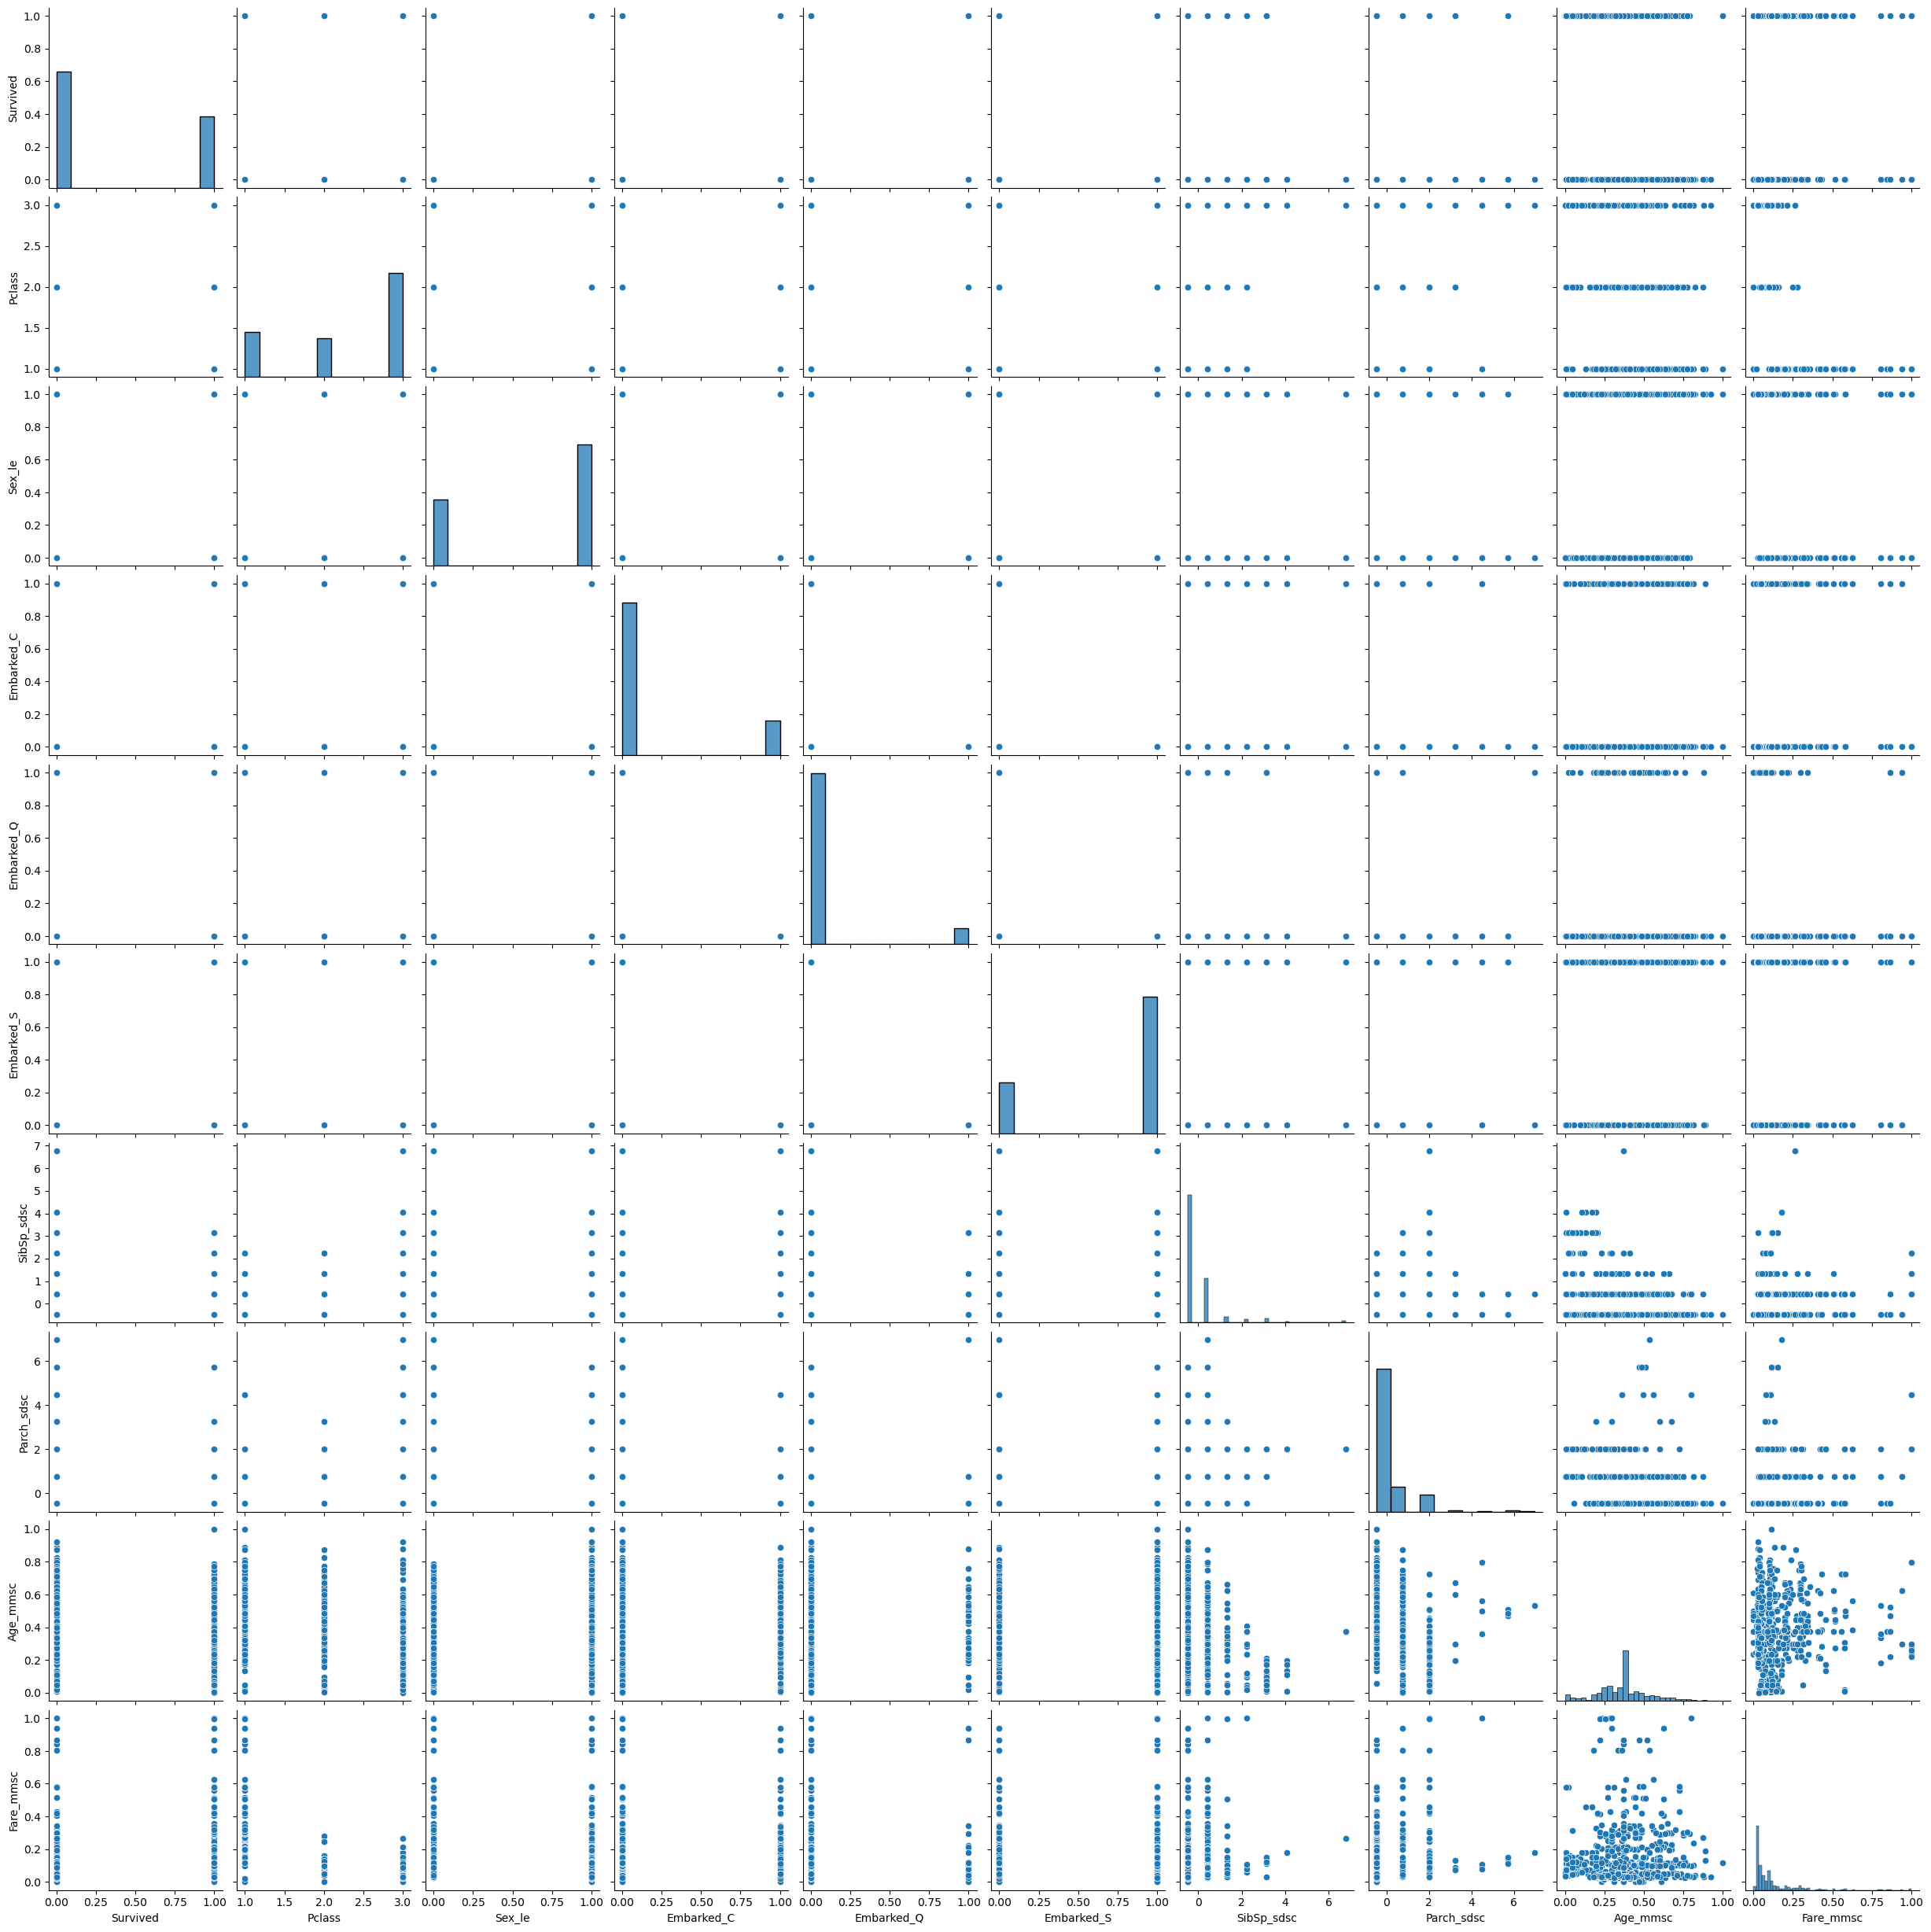

In [102]:
sns.pairplot(train_2)

# 1번 데이터와 2번 데이터를 학습 데이터와 테스트 데이터로 구분하기

In [104]:
train_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [105]:
train_2.columns

Index(['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc'],
      dtype='object')

In [115]:
train_1= train_1.reset_index(drop=True)
train_2= train_2.reset_index(drop=True)

In [116]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test= train_test_split(train_1[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
                                                       , train_1['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_1['Survived'].shape, X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(891,) (623, 7) (268, 7) (623,) (268,)


In [117]:
X2_train, X2_test, y2_train, y2_test= train_test_split(train_2[['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc']]
                                                       , train_2['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_2['Survived'].shape, X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(891,) (623, 10) (268, 10) (623,) (268,)


In [118]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    float64
 1   Pclass      888 non-null    float64
 2   Sex_le      888 non-null    float64
 3   Embarked_C  888 non-null    float64
 4   Embarked_Q  888 non-null    float64
 5   Embarked_S  888 non-null    float64
 6   SibSp_sdsc  888 non-null    float64
 7   Parch_sdsc  888 non-null    float64
 8   Age_mmsc    888 non-null    float64
 9   Fare_mmsc   888 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [119]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [120]:
print((train_1['Survived'] == train_2['Survived']).all())  # True면 동일한 값

False


In [121]:
train_1.shape

(891, 7)

In [122]:
train_2.shape

(891, 10)

In [129]:
train_2['Fare_mmsc'].value_counts


<bound method IndexOpsMixin.value_counts of 0      0.027567
1      0.271039
2      0.030133
3      0.201901
4      0.030608
         ...   
886    0.114068
887    0.029468
888         NaN
889         NaN
890         NaN
Name: Fare_mmsc, Length: 891, dtype: float64>

In [130]:
train_2['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    1.0
887    0.0
888    NaN
889    NaN
890    NaN
Name: Survived, Length: 891, dtype: float64>

In [142]:
train_2 = train_2.dropna(subset=['Fare_mmsc'])

In [132]:
train_2.shape

(888, 10)

In [133]:
train_2['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
883    0.0
884    1.0
885    0.0
886    1.0
887    0.0
Name: Survived, Length: 888, dtype: float64>

In [134]:
X2_train, X2_test, y2_train, y2_test= train_test_split(train_2[['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc']]
                                                       , train_2['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_2['Survived'].shape, X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(888,) (621, 10) (267, 10) (621,) (267,)


In [135]:
print(train_1['Survived'].shape, X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(891,) (623, 7) (268, 7) (623,) (268,)


In [141]:
train_2.isna().sum()

Survived      0
Pclass        0
Sex_le        0
Embarked_C    3
Embarked_Q    3
Embarked_S    3
SibSp_sdsc    0
Parch_sdsc    0
Age_mmsc      0
Fare_mmsc     0
dtype: int64

In [145]:
train_2= train_2.dropna(subset=['Embarked_C'])
train_2= train_2.dropna(subset=['Embarked_Q'])
train_2= train_2.dropna(subset=['Embarked_S'])

In [146]:
train_2.isna().sum()

Survived      0
Pclass        0
Sex_le        0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
SibSp_sdsc    0
Parch_sdsc    0
Age_mmsc      0
Fare_mmsc     0
dtype: int64

In [147]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 884
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    885 non-null    float64
 1   Pclass      885 non-null    float64
 2   Sex_le      885 non-null    float64
 3   Embarked_C  885 non-null    float64
 4   Embarked_Q  885 non-null    float64
 5   Embarked_S  885 non-null    float64
 6   SibSp_sdsc  885 non-null    float64
 7   Parch_sdsc  885 non-null    float64
 8   Age_mmsc    885 non-null    float64
 9   Fare_mmsc   885 non-null    float64
dtypes: float64(10)
memory usage: 76.1 KB


In [148]:
X2_train, X2_test, y2_train, y2_test= train_test_split(train_2[['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc']]
                                                       , train_2['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_2['Survived'].shape, X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(885,) (619, 10) (266, 10) (619,) (266,)


In [149]:
print(train_1['Survived'].shape, X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(891,) (623, 7) (268, 7) (623,) (268,)


In [ ]:
ㅇㄹㄴㅇ